Prepocess text: lowercasing, removing punctuation and stopwords (excluding may, will, etc.)

In [2]:
%pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [nltk]2/3 [nltk]b]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

# Download resources once
nltk.download("punkt")
nltk.download("stopwords")

# Define the modals to preserve
MODAL_VERBS = {
    "can", "could", "may", "might", "must", "shall", "should", "will", "would"
}

# Build custom stopword list (remove modal verbs from standard stopwords)
stop_words = set(stopwords.words("english")) - MODAL_VERBS

def remove_special_chars(text):
    # Keep standard ASCII characters and typical punctuation
    return re.sub(r"[^\x00-\x7F]+", "", text)

def preprocess_text(raw_text):
    """
    Preprocess the input text by:
    - Removing non-ASCII characters
    - Lowercasing
    - Removing punctuation (but preserving sentence structure)
    - Removing stopwords (except modal verbs)
    Returns a list of cleaned sentences.
    """
    preprocessed_sentences = []

    # Clean unusual special characters
    raw_text = remove_special_chars(raw_text)

    # Sentence tokenize
    sentences = sent_tokenize(raw_text)

    for sentence in sentences:
        # Lowercase
        sentence = sentence.lower()

        # Remove basic punctuation (keep alphanumeric and whitespace)
        sentence = re.sub(r"[^a-z0-9\s]", "", sentence)

        # Tokenize and filter stopwords
        words = word_tokenize(sentence)
        filtered_words = [w for w in words if w not in stop_words]

        # Reconstruct cleaned sentence
        cleaned_sentence = " ".join(filtered_words)
        preprocessed_sentences.append(cleaned_sentence)

    return preprocessed_sentences

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/valeriiaklynna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valeriiaklynna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from pathlib import Path

# Path setup
repo_root = Path().resolve().parent
input_folder = repo_root / "2_output" / "extracted_text_indiv"
output_folder = repo_root / "2_output" / "extracted_text_indiv"
output_folder.mkdir(parents=True, exist_ok=True)

for filename in ["High_Emission_equal.txt", "Low_Emission_equal.txt", "High_Emission_total.txt", "Low_Emission_total.txt"]:
    input_path = input_folder / filename
    output_path = output_folder / filename.replace(".txt", "_preprocessed.txt")

    with open(input_path, "r", encoding="utf-8") as f:
        raw_text = f.read()

    preprocessed_sentences = preprocess_text(raw_text)

    with open(output_path, "w", encoding="utf-8") as out_f:
        out_f.write("\n".join(preprocessed_sentences))

    print(f"✅ Preprocessed: {filename} → {output_path.name}")

✅ Preprocessed: High_Emission_equal.txt → High_Emission_equal_preprocessed.txt
✅ Preprocessed: Low_Emission_equal.txt → Low_Emission_equal_preprocessed.txt
✅ Preprocessed: High_Emission_total.txt → High_Emission_total_preprocessed.txt
✅ Preprocessed: Low_Emission_total.txt → Low_Emission_total_preprocessed.txt


Hedging anf forward-looking trends

In [18]:
# Hedging and forward-looking phrases
HEDGING_PHRASES = [
    "may", "might", "could", "potentially", "assume",
    "expected to", "anticipated", "planned", "typically", "generally", "likely",
    "intend", "estimate", "believe", "aim", "tend to", "subject to", "limitations"
]

# Forward-looking indicators (future promises/plans)
FORWARD_LOOKING_PHRASES = [
    "will", "plan to", "aim to", "target", "commit to", "intend to",
    "expect", "expected to", "future", "in the coming years", "forecast", "potential", "next"
]

# Stopwords minus modal verbs
MODALS = {"can", "could", "may", "might", "must", "shall", "should", "will", "would"}
stop_words = set(stopwords.words("english")) - MODALS

# === Functions ===
def count_phrases(text, phrases):
    """
    Count occurrences of each phrase in the text (case-insensitive).
    """
    counts = Counter()
    for phrase in phrases:
        # Match whole words or exact phrases, ignoring case
        pattern = re.compile(rf"\b{re.escape(phrase)}\b", flags=re.IGNORECASE)
        matches = pattern.findall(text)
        if matches:
            counts[phrase] = len(matches)
    return counts

In [19]:
from collections import Counter

high_path = Path("../2_output/extracted_text_indiv/High_Emission_equal_preprocessed.txt")
low_path = Path("../2_output/extracted_text_indiv/Low_Emission_equal_preprocessed.txt")

with open(high_path, "r", encoding="utf-8") as f:
    high_text = f.read()

with open(low_path, "r", encoding="utf-8") as f:
    low_text = f.read()

# Count hedging and forward-looking
high_hedging = count_phrases(high_text, HEDGING_PHRASES)
low_hedging = count_phrases(low_text, HEDGING_PHRASES)

high_forward = count_phrases(high_text, FORWARD_LOOKING_PHRASES)
low_forward = count_phrases(low_text, FORWARD_LOOKING_PHRASES)

In [20]:
from IPython.display import display
import pandas as pd

# Combine results
hedging_df = pd.DataFrame([high_hedging, low_hedging], index=["High", "Low"]).fillna(0).astype(int)
forward_df = pd.DataFrame([high_forward, low_forward], index=["High", "Low"]).fillna(0).astype(int)

# Display in notebook
print(" Hedging Phrase Frequency:")
display(hedging_df)

print("\n Forward-Looking Phrase Frequency:")
display(forward_df)

 Hedging Phrase Frequency:


,may,might,could,potentially,assume,anticipated,planned,typically,generally,likely,intend,estimate,believe,aim,limitations
High,477,37,375,71,3,96,151,15,83,47,12,56,52,181,24
Low,329,24,139,51,14,23,103,13,22,87,12,15,24,148,31



 Forward-Looking Phrase Frequency:


,will,target,expect,future,forecast,potential,next
High,866,1492,27,420,10,652,99
Low,775,850,52,205,19,514,57


In [21]:
# %pip install matplotlib

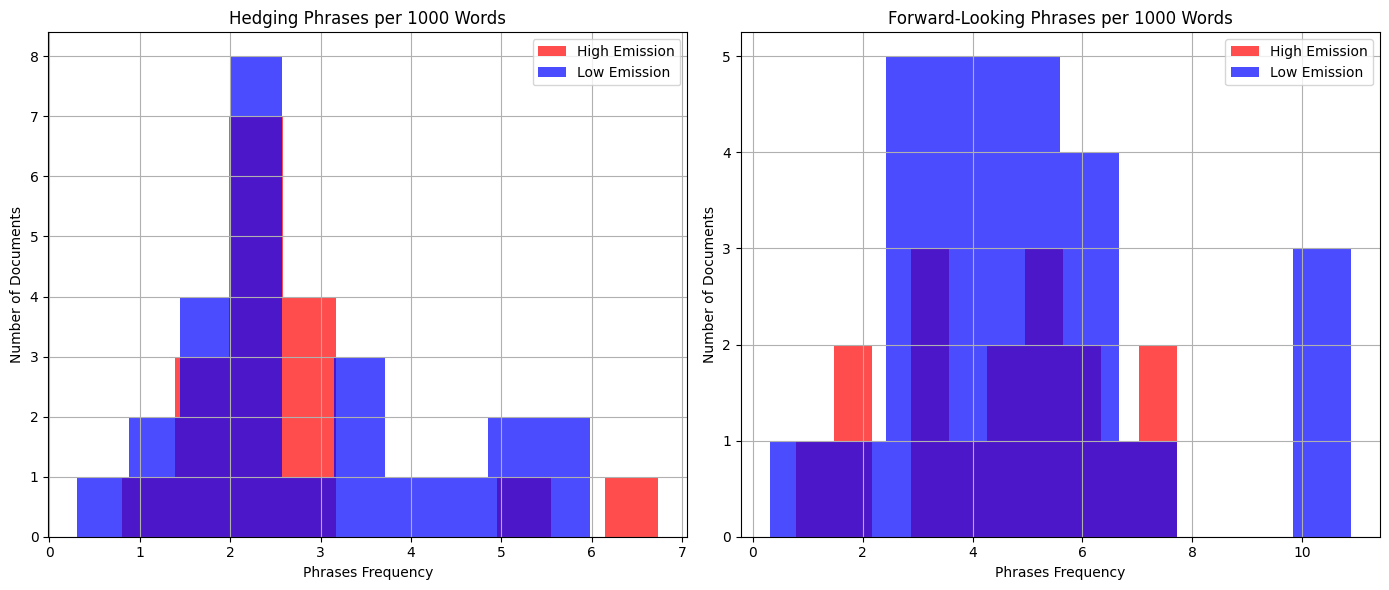

In [22]:
import matplotlib.pyplot as plt

# === Combine phrases into compiled regex patterns ===
def compile_pattern(phrases):
    return re.compile(r'\b(?:' + '|'.join(re.escape(p) for p in phrases) + r')\b', flags=re.IGNORECASE)

hedging_pattern = compile_pattern(HEDGING_PHRASES)
forward_pattern = compile_pattern(FORWARD_LOOKING_PHRASES)

high_text = (input_folder / "High_Emission_total.txt").read_text(encoding="utf-8")
low_text = (input_folder / "Low_Emission_total.txt").read_text(encoding="utf-8")

def extract_per_document_stats(text, hedging_pattern, forward_pattern):
    blocks = re.split(r"--- .*? ---", text)
    stats = {"hedging": [], "forward": []}
    for block in blocks:
        block = block.strip()
        if not block:
            continue
        word_count = len(block.split())
        if word_count == 0:
            continue
        stats["hedging"].append(len(hedging_pattern.findall(block)) / word_count * 1000)
        stats["forward"].append(len(forward_pattern.findall(block)) / word_count * 1000)
    return stats

# === Compute Stats ===
results = {
    "High": extract_per_document_stats(high_text, hedging_pattern, forward_pattern),
    "Low": extract_per_document_stats(low_text, hedging_pattern, forward_pattern)
}

# === Plot histograms ===
plt.figure(figsize=(14, 6))

# Hedging
plt.subplot(1, 2, 1)
plt.hist(results["High"]["hedging"], bins=10, alpha=0.7, label="High Emission", color="red")
plt.hist(results["Low"]["hedging"], bins=10, alpha=0.7, label="Low Emission", color="blue")
plt.title("Hedging Phrases per 1000 Words")
plt.xlabel("Phrases Frequency")
plt.ylabel("Number of Documents")
plt.legend()
plt.grid(True)

# Forward-looking
plt.subplot(1, 2, 2)
plt.hist(results["High"]["forward"], bins=10, alpha=0.7, label="High Emission", color="red")
plt.hist(results["Low"]["forward"], bins=10, alpha=0.7, label="Low Emission", color="blue")
plt.title("Forward-Looking Phrases per 1000 Words")
plt.xlabel("Phrases Frequency")
plt.ylabel("Number of Documents")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

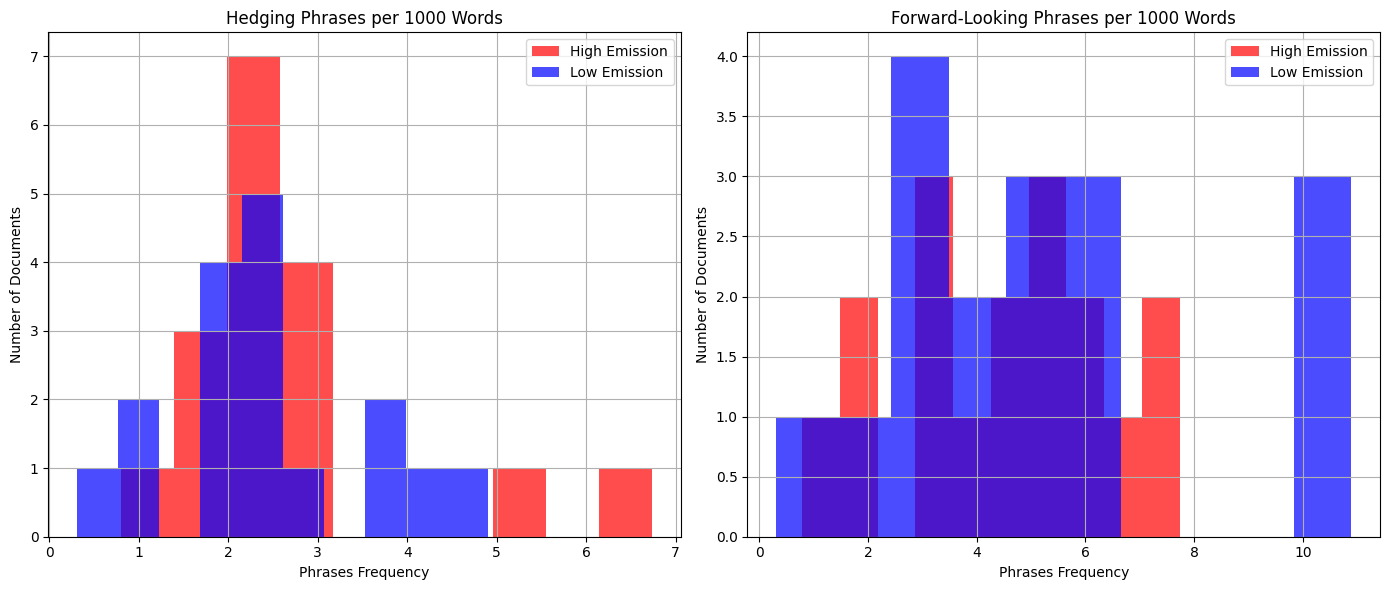

In [23]:
high_text = (input_folder / "High_Emission_equal.txt").read_text(encoding="utf-8")
low_text = (input_folder / "Low_Emission_equal.txt").read_text(encoding="utf-8")

results = {
    "High": extract_per_document_stats(high_text, hedging_pattern, forward_pattern),
    "Low": extract_per_document_stats(low_text, hedging_pattern, forward_pattern)
}

# === Plot histograms ===
plt.figure(figsize=(14, 6))

# Hedging
plt.subplot(1, 2, 1)
plt.hist(results["High"]["hedging"], bins=10, alpha=0.7, label="High Emission", color="red")
plt.hist(results["Low"]["hedging"], bins=10, alpha=0.7, label="Low Emission", color="blue")
plt.title("Hedging Phrases per 1000 Words")
plt.xlabel("Phrases Frequency")
plt.ylabel("Number of Documents")
plt.legend()
plt.grid(True)

# Forward-looking
plt.subplot(1, 2, 2)
plt.hist(results["High"]["forward"], bins=10, alpha=0.7, label="High Emission", color="red")
plt.hist(results["Low"]["forward"], bins=10, alpha=0.7, label="Low Emission", color="blue")
plt.title("Forward-Looking Phrases per 1000 Words")
plt.xlabel("Phrases Frequency")
plt.ylabel("Number of Documents")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Average Word Count per Document:
High Emission: 46970.41 words
Low Emission : 29413.65 words


/var/folders/w7/8xn0b2_s6r9blvx6hhd3g9fr0000gn/T/ipykernel_2189/1726716210.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_word_counts, low_word_counts], labels=["High Emission", "Low Emission"])


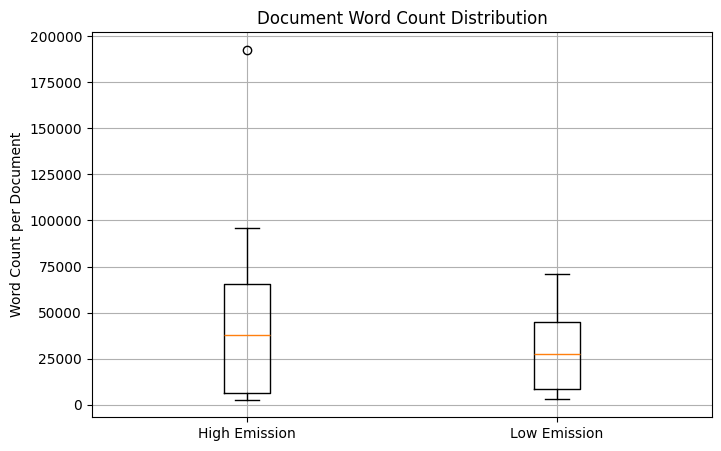

In [25]:
def get_word_counts(text):
    blocks = re.split(r"--- .*? ---", text)
    return [len(block.strip().split()) for block in blocks if block.strip()]

high_text = (input_folder / "High_Emission_equal.txt").read_text(encoding="utf-8")
low_text = (input_folder / "Low_Emission_equal.txt").read_text(encoding="utf-8")

high_word_counts = get_word_counts(high_text)
low_word_counts = get_word_counts(low_text)

# === Print averages ===
print("Average Word Count per Document:")
print(f"High Emission: {sum(high_word_counts) / len(high_word_counts):.2f} words")
print(f"Low Emission : {sum(low_word_counts) / len(low_word_counts):.2f} words")

# === Optional: Boxplot visualization ===
plt.figure(figsize=(8, 5))
plt.boxplot([high_word_counts, low_word_counts], labels=["High Emission", "Low Emission"])
plt.title("Document Word Count Distribution")
plt.ylabel("Word Count per Document")
plt.grid(True)
plt.show()

In [29]:
high_text = (input_folder / "High_Emission_equal.txt").read_text(encoding="utf-8")
low_text = (input_folder / "Low_Emission_equal.txt").read_text(encoding="utf-8")

# === Count stats for each document block ===
def extract_stats(text):
    blocks = re.split(r"--- .*? ---", text)
    word_counts = []
    hedging_counts = []
    forward_counts = []

    for block in blocks:
        block = block.strip()
        if not block:
            continue
        words = block.split()
        word_count = len(words)
        if word_count == 0:
            continue

        hedging_hits = len(hedging_pattern.findall(block))
        forward_hits = len(forward_pattern.findall(block))

        word_counts.append(word_count)
        hedging_counts.append(hedging_hits / word_count * 1000)
        forward_counts.append(forward_hits / word_count * 1000)

    return {
        "word_avg": sum(word_counts) / len(word_counts),
        "hedging_avg": sum(hedging_counts) / len(hedging_counts),
        "forward_avg": sum(forward_counts) / len(forward_counts),
    }

# === Calculate stats ===
high_stats = extract_stats(high_text)
low_stats = extract_stats(low_text)

# === Print results ===
print("Average Statistics per Document:")
print(f"High Emission:")
print(f"  Avg Word Count: {high_stats['word_avg']:.1f}")
print(f"  Hedging per 1000 words: {high_stats['hedging_avg']:.2f}")
print(f"  Forward-looking per 1000 words: {high_stats['forward_avg']:.2f}")
print()
print(f"Low Emission:")
print(f"  Avg Word Count: {low_stats['word_avg']:.1f}")
print(f"  Hedging per 1000 words: {low_stats['hedging_avg']:.2f}")
print(f"  Forward-looking per 1000 words: {low_stats['forward_avg']:.2f}")

📊 Average Statistics per Document:
High Emission:
  Avg Word Count: 46970.4
  Hedging per 1000 words: 2.66
  Forward-looking per 1000 words: 4.45

Low Emission:
  Avg Word Count: 29413.6
  Hedging per 1000 words: 2.42
  Forward-looking per 1000 words: 5.10



📊 Mann–Whitney U Test Results:
Hedging: U = 137.00, p = 0.809 → Not significant
Forward-looking: U = 127.00, p = 0.558 → Not significant
